In [123]:
import pandas as pd

In [124]:
df = pd.read_csv('smm_data.csv')
df.head()

,Unnamed: 0.1,Unnamed: 0,Channel,total_views,total_subscribers,videos
0,0,0,Zach's Tech Turf,1304037610,1260000,2649
1,1,1,Dawid Does Tech Stuff,188491721,719000,659
2,2,2,John and Pam Hall Wildlife Videos,252171,2310,27
3,3,3,Wildlife,766117,1990,26
4,4,4,Taarak Mehta Ka Ooltah Chashmah Episodes,6620907278,3890000,13934


In [125]:
df = df.drop('Unnamed: 0.1', axis=1)

In [126]:
df = df.drop('Unnamed: 0', axis=1)

In [127]:
df.head()

,Channel,total_views,total_subscribers,videos
0,Zach's Tech Turf,1304037610,1260000,2649
1,Dawid Does Tech Stuff,188491721,719000,659
2,John and Pam Hall Wildlife Videos,252171,2310,27
3,Wildlife,766117,1990,26
4,Taarak Mehta Ka Ooltah Chashmah Episodes,6620907278,3890000,13934


In [128]:
df.count()

,0
Channel,500
total_views,500
total_subscribers,500
videos,500


In [129]:
df.dtypes

,0
Channel,object
total_views,int64
total_subscribers,int64
videos,int64


In [130]:
df['total_views'] = pd.to_numeric(df['total_views'])
df['total_subscribers'] = pd.to_numeric(df['total_subscribers'])
df['videos'] = pd.to_numeric(df['videos'])

In [131]:
df.dtypes

,0
Channel,object
total_views,int64
total_subscribers,int64
videos,int64


In [143]:
# Checking total number of duplicate rows
num_duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")

# Dsiplaying the duplicate rows
duplicates = df[df.duplicated(keep=False)]
print(duplicates)

Number of duplicate rows: 50
                 Channel  total_views  total_subscribers  videos  \
100  The Gaming Merchant    323134006             940000    1280   
101      FUNNY GAMING TV    594616617            2430000    2019   
102            ND Gaming    676111170            1140000    3581   
103   The Game Theorists   4415174087           19500000     762   
104        Senpai Gaming     94850021             706000     561   
..                   ...          ...                ...     ...   
395           CKN Gaming   1331960992            1320000     507   
396   WhatCulture Gaming    951664866            1710000    6343   
397         Ceave Gaming    157250504             504000     231   
398        Fierik Gaming     59505483             208000     640   
399         PAYAL GAMING    433889120            4290000     927   

     views_per_video  subs_per_video  
100     2.524484e+05      734.375000  
101     2.945105e+05     1203.566122  
102     1.888051e+05      318.346830 

In [144]:
# Dropping duplicates
df_clean = df.drop_duplicates()

print(f"Original shape: {df.shape}")
print(f"New shape: {df_clean.shape}")

Original shape: (494, 6)
New shape: (444, 6)


In [145]:
import seaborn as sns

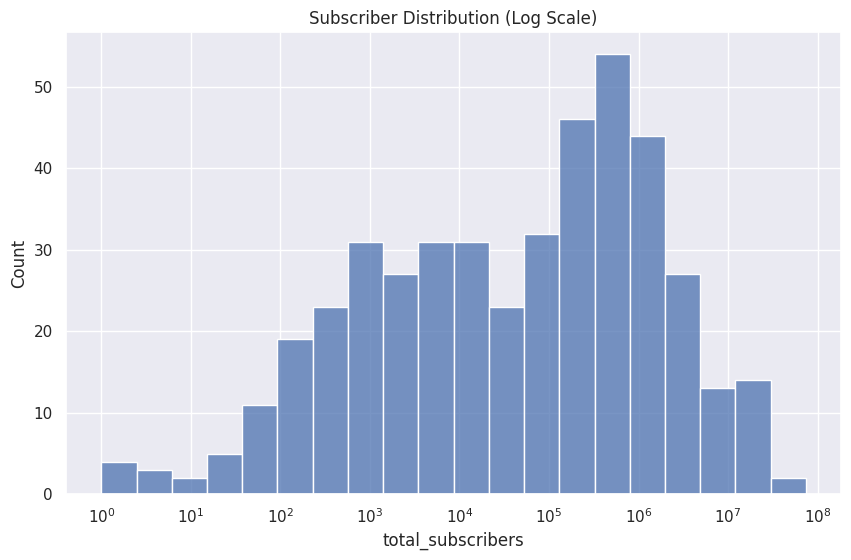

In [154]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.histplot(data=df_clean, x='total_subscribers', bins=20, log_scale=True)
plt.title('Subscriber Distribution (Log Scale)')
plt.show()

<ipython-input-155-87116ce8e854>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='total_subscribers', y='Channel', data=top_10, palette='viridis')


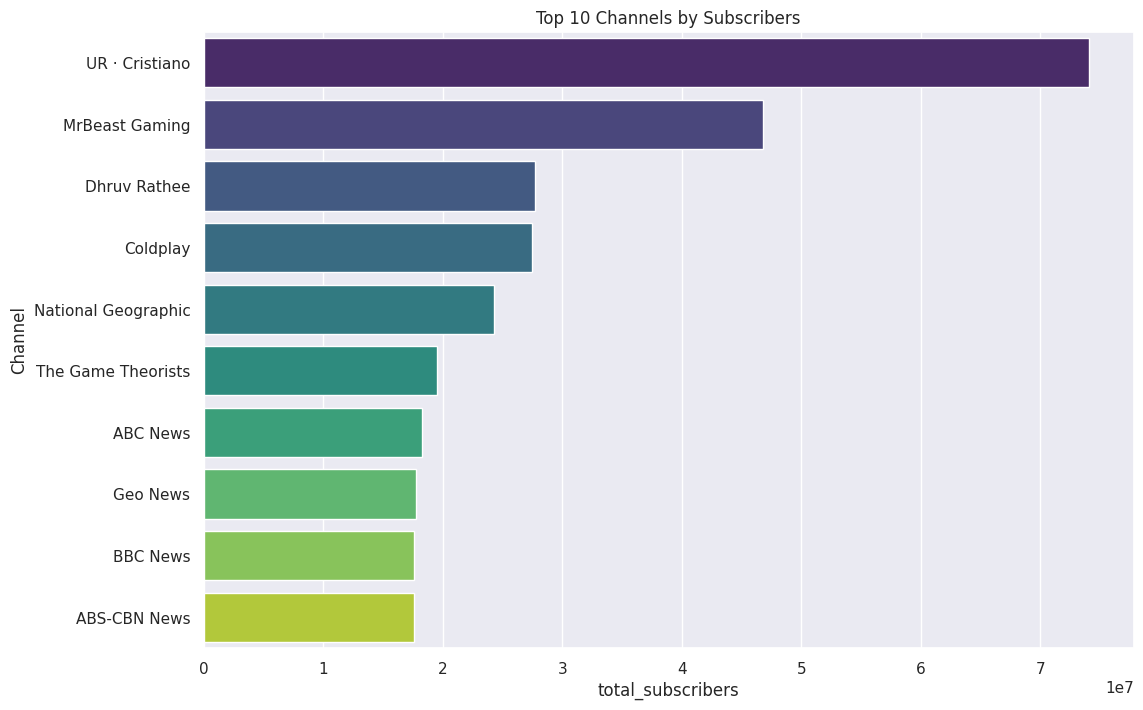

In [155]:
top_10 = df_clean.sort_values('total_subscribers', ascending=False).head(10)
sns.set(rc={'figure.figsize': (12,8)})
sns.barplot(x='total_subscribers', y='Channel', data=top_10, palette='viridis')
plt.title('Top 10 Channels by Subscribers')
plt.show()

<ipython-input-156-deaa4bad302c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='total_views', y='Channel', data=top_10, palette='viridis')


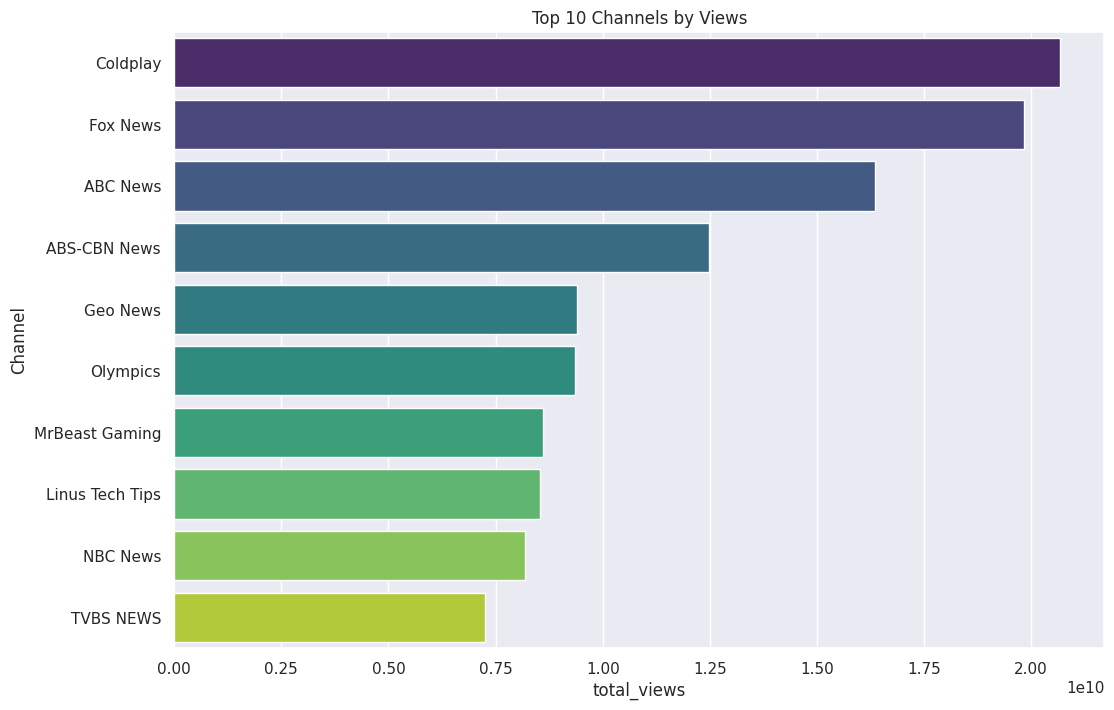

In [156]:
top_10 = df_clean.sort_values('total_views', ascending=False).head(10)
sns.set(rc={'figure.figsize': (12,8)})
sns.barplot(x='total_views', y='Channel', data=top_10, palette='viridis')
plt.title('Top 10 Channels by Views')
plt.show()

<ipython-input-157-2ff9f0fdb0a2>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='videos', y='Channel', data=top_10, palette='viridis')
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26085 (\N{CJK UNIFIED IDEOGRAPH-65E5}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12486 (\N{KATAKANA LETTER TE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12524 (\N{KATAKANA LETTER RE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


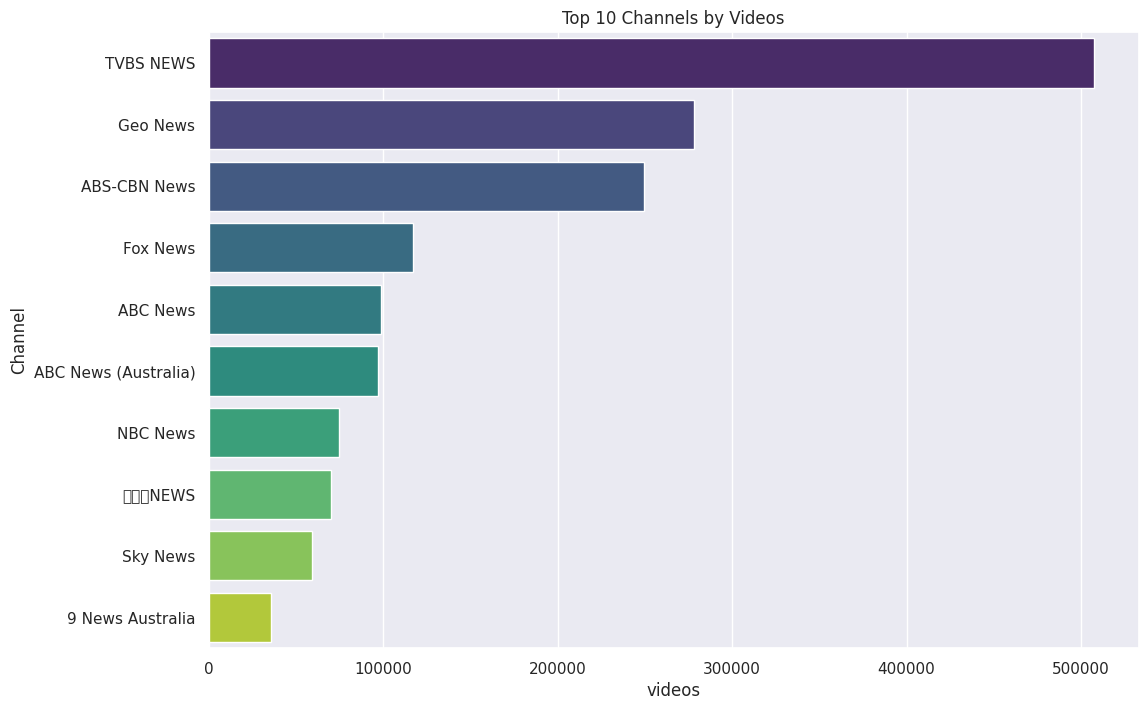

In [157]:
top_10 = df_clean.sort_values('videos', ascending=False).head(10)
sns.set(rc={'figure.figsize': (12,8)})
sns.barplot(x='videos', y='Channel', data=top_10, palette='viridis')
plt.title('Top 10 Channels by Videos')
plt.show()

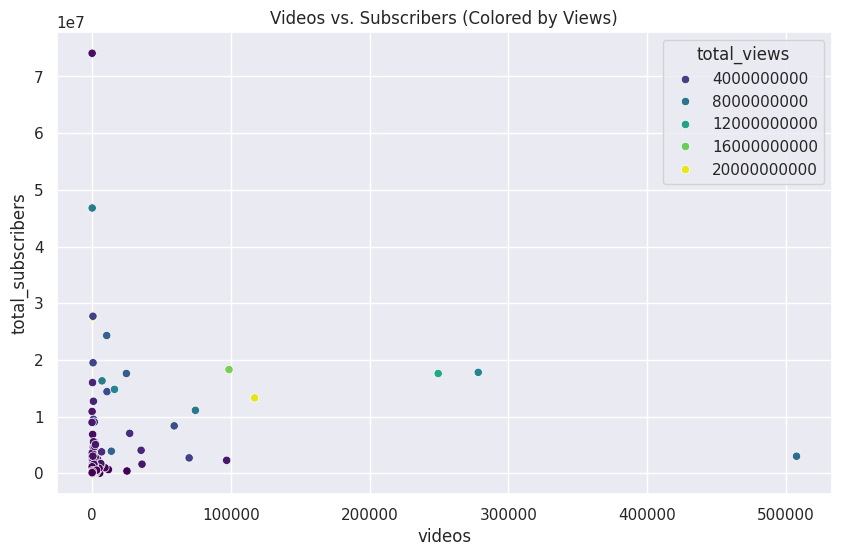

In [158]:

plt.figure(figsize=(10,6))
sns.scatterplot(x='videos', y='total_subscribers', data=df_clean, hue='total_views', palette='viridis')
plt.title('Videos vs. Subscribers (Colored by Views)')
plt.show()

In [159]:
# Calculating efficiency ratios
df['views_per_video'] = df_clean['total_views'] / df_clean['videos']
df['subs_per_video'] = df_clean['total_subscribers'] / df_clean['videos']


<ipython-input-160-a79f461706fe>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='views_per_video', y='Channel', data=top_channels, palette='rocket')


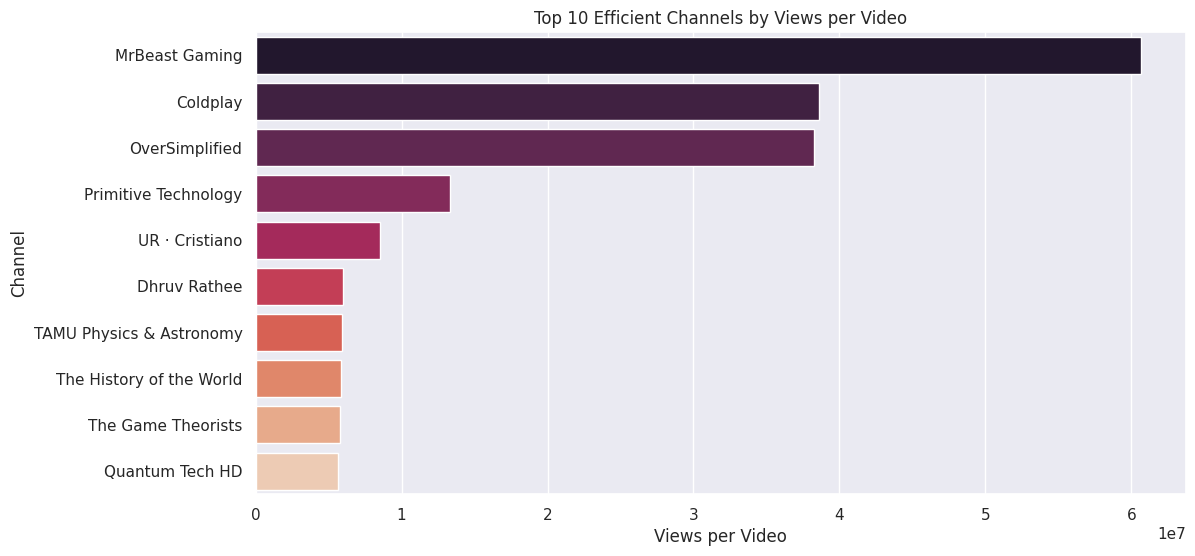

In [160]:
# Sorting by efficiency
top_channels = df_clean.sort_values('views_per_video', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x='views_per_video', y='Channel', data=top_channels, palette='rocket')
plt.xlabel('Views per Video')
plt.title('Top 10 Efficient Channels by Views per Video')
plt.show()

In [165]:
df_clean.tail()

,Channel,total_views,total_subscribers,videos,views_per_video,subs_per_video
495,Science IRL,481656,11400,60,8.027600e+03,190.000000
496,Insider Science,880111696,3020000,649,1.356104e+06,4653.312789
497,MooMooMath and Science,162564389,545000,3348,4.855567e+04,162.783751
498,Science Shorts,21507565,272000,430,5.001759e+04,632.558140
499,Science Sauce,15376756,106000,111,1.385293e+05,954.954955


In [264]:
from sklearn.preprocessing import StandardScaler

# features
features = df_clean[["videos", "total_subscribers", "total_views"]]

# Scaling the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [265]:
from sklearn.cluster import KMeans

# Initialize KMeans
k = 4
model = KMeans(n_clusters=k, random_state=42)
model.fit(scaled_features)

KMeans(n_clusters=4, random_state=42)

In [266]:
# Adding cluster labels to the original DataFrame
df_clean['cluster'] = model.labels_

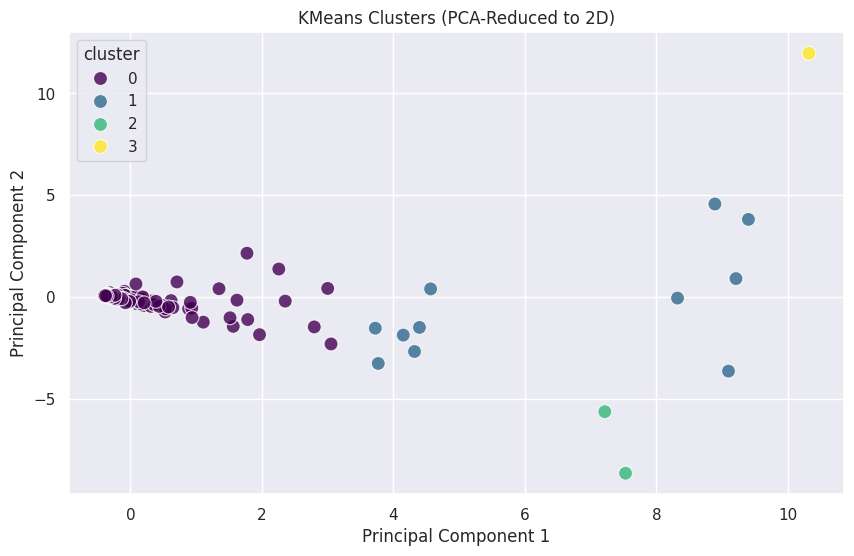

In [267]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Reducing features to 2D using PCA
pca = PCA(n_components=2)
features_2d = pca.fit_transform(scaled_features)

# Creating a DataFrame for plotting
plot_df = pd.DataFrame({
    'x': features_2d[:, 0],
    'y': features_2d[:, 1],
    'cluster': df_clean['cluster']
})

# Plotting clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=plot_df,
    x='x',
    y='y',
    hue='cluster',
    palette='viridis',
    alpha=0.8,
    s=100
)
plt.title('KMeans Clusters (PCA-Reduced to 2D)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [212]:
import pandas as pd
import numpy as np
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
import networkx as nx
import community as community_louvain
import matplotlib.pyplot as plt

# Sample df_clean structure (replace with your actual data):
# df_clean = pd.DataFrame({
#     'Channel': ['Channel1', 'Channel2', ...],
#     'videos': [100, 200, ...],
#     'total_subscribers': [10000, 50000, ...],
#     'total_views': [1e6, 5e6, ...]
# })

# 1. Preprocess features
features = df_clean[["videos", "total_subscribers", "total_views"]]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# 2. Use KNN to find similar channels (k=5 nearest neighbors)
k = 5
knn = NearestNeighbors(n_neighbors=k, metric='euclidean').fit(scaled_features)
distances, indices = knn.kneighbors(scaled_features)

# 3. Create edges between similar channels
edges = []
for i, neighbors in enumerate(indices):
    for j in neighbors:
        if i != j:  # Avoid self-loops
            edges.append((df_clean['Channel'].iloc[i], df_clean['Channel'].iloc[j]))

# 4. Build the graph
G = nx.Graph()
G.add_edges_from(edges)

In [221]:
!pip install python-louvain

In [222]:
import community as community_louvain  # <-- Correct import for Louvain

In [223]:
print(dir(community_louvain))  # Should list 'best_partition'

['__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__']


In [218]:
!pip uninstall community

Found existing installation: community 1.0.0b1
Uninstalling community-1.0.0b1:
  Would remove:
    /usr/local/lib/python3.11/dist-packages/community-1.0.0b1.dist-info/*
    /usr/local/lib/python3.11/dist-packages/community/*
  Would not remove (might be manually added):
    /usr/local/lib/python3.11/dist-packages/community/community_louvain.py
    /usr/local/lib/python3.11/dist-packages/community/community_status.py
Proceed (Y/n)? Y
  Successfully uninstalled community-1.0.0b1


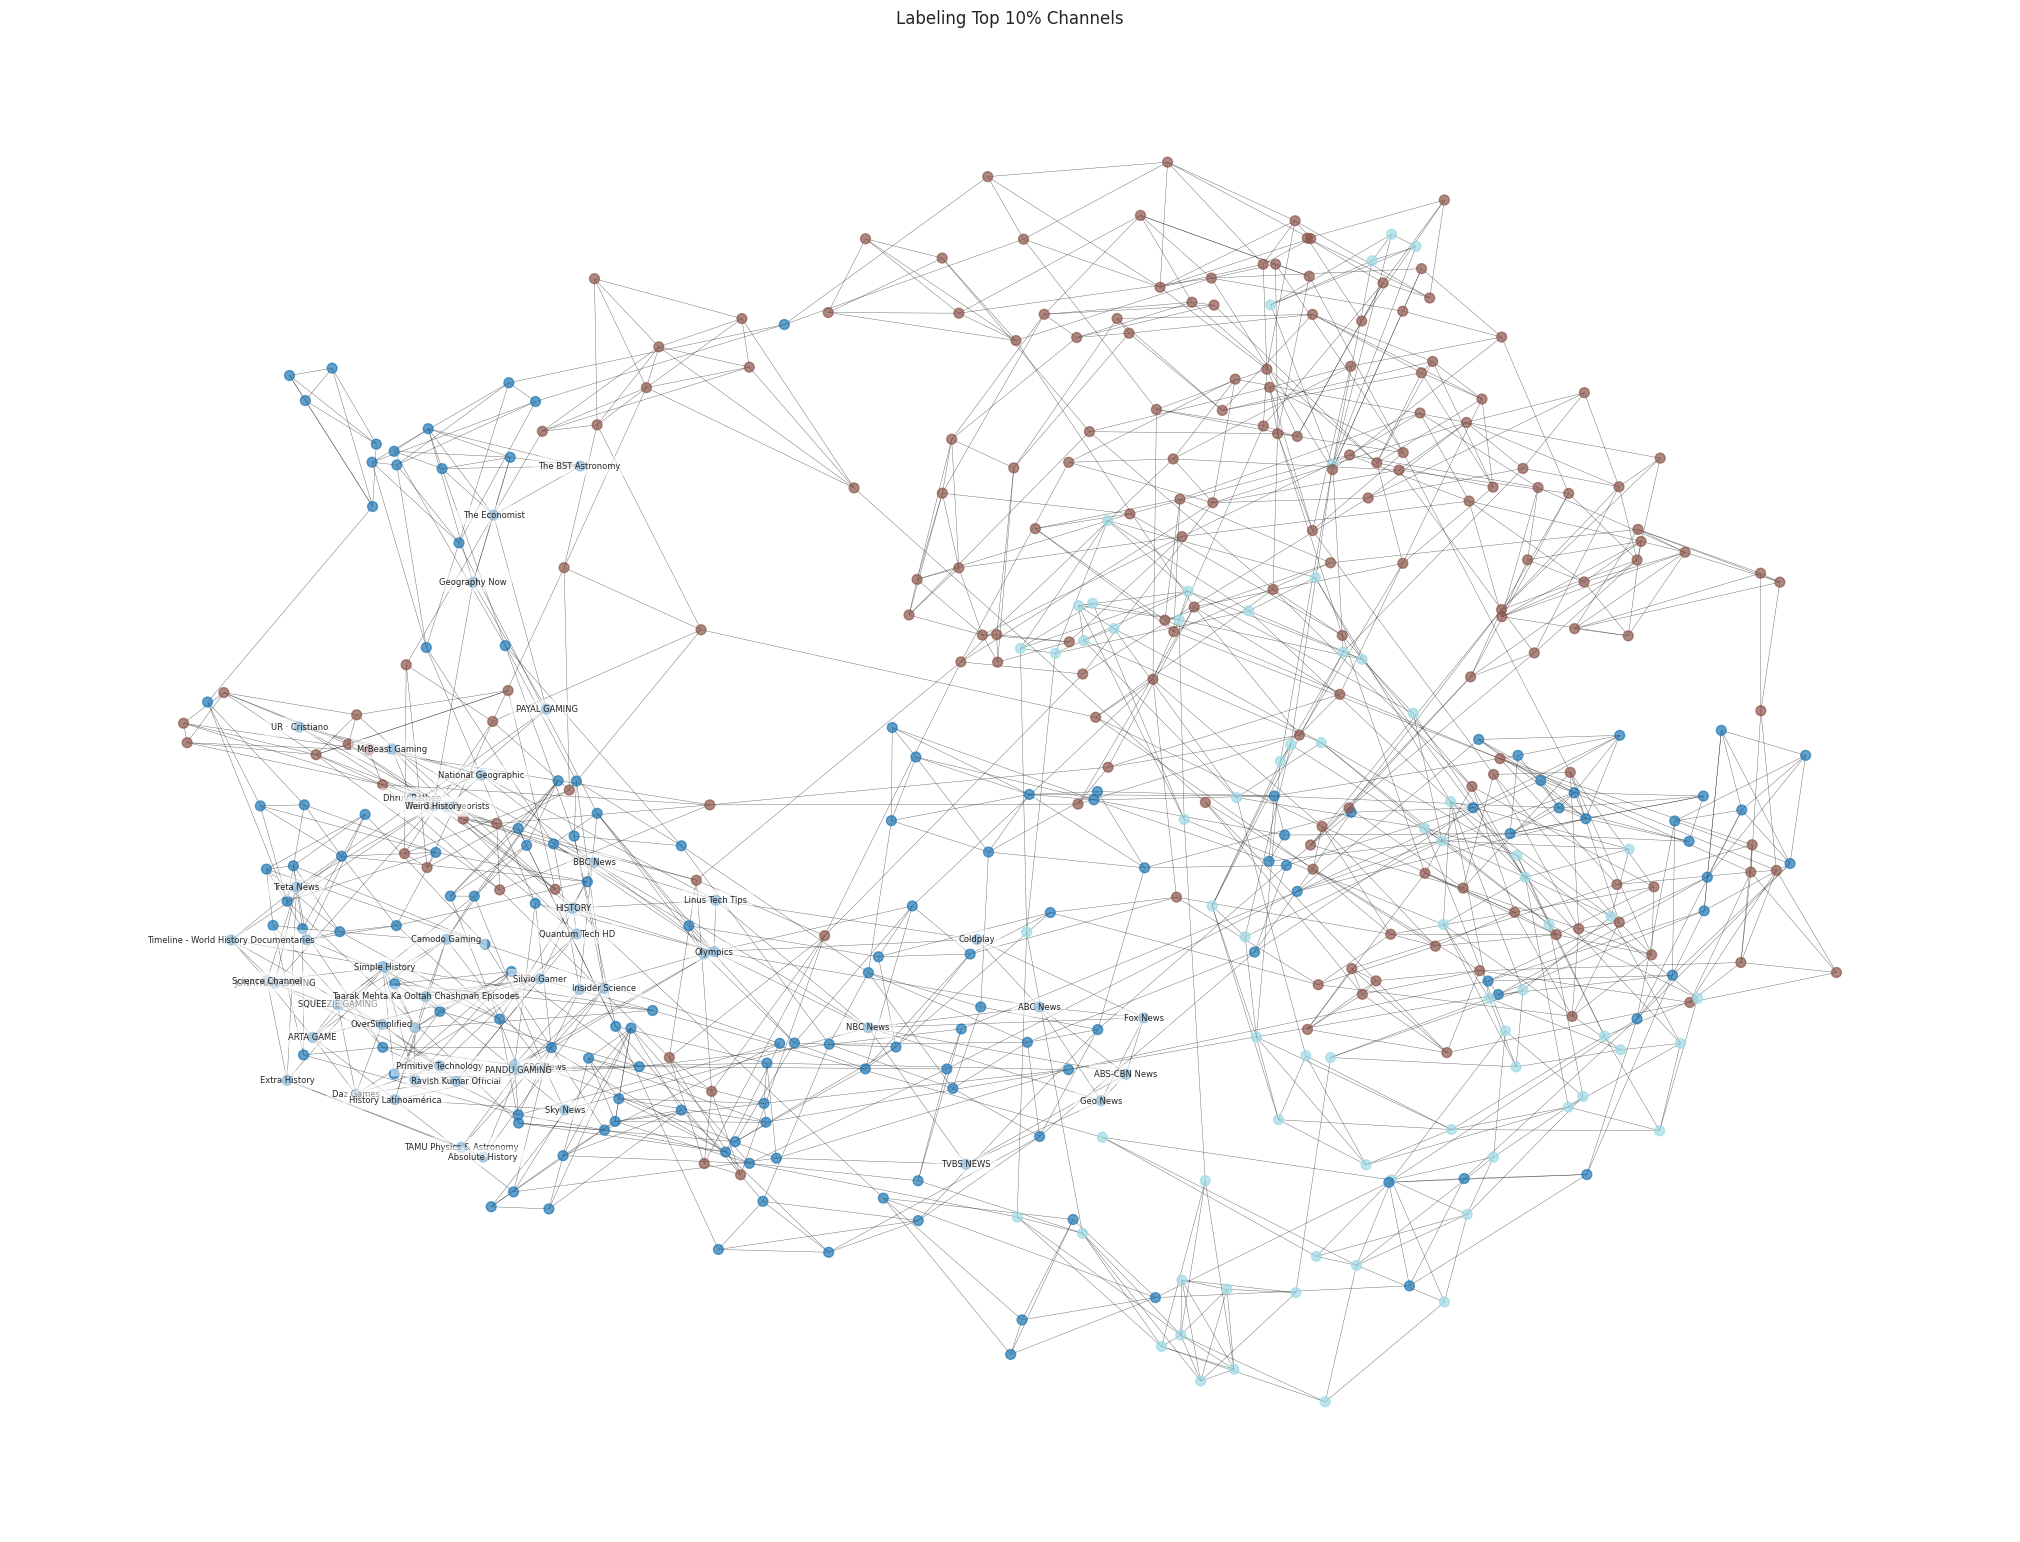


Community Statistics (3 Groups):
                 videos        total_subscribers             total_views  \
                   mean median              mean    median          mean   
community                                                                  
0          10079.369231  674.0      3.245644e+06  910000.0  1.180777e+09   
1            224.522472  153.5      2.399551e+04    5675.0  3.700724e+06   
2            515.239437  433.0      3.249859e+05  301000.0  5.914212e+07   

                       count  
                median count  
community                     
0          148205336.0   195  
1             566979.5   178  
2           47484554.0    71  


In [254]:
import numpy as np
import networkx as nx
from networkx.algorithms.community import girvan_newman

features = df_clean[["videos", "total_subscribers", "total_views"]]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

k = 5
knn = NearestNeighbors(n_neighbors=k, metric='euclidean').fit(scaled_features)
distances, indices = knn.kneighbors(scaled_features)

threshold = np.percentile(distances, 50)  # Keeping top 50% closest connections
edges = []
for i, neighbors in enumerate(indices):
    for j, dist in zip(neighbors, distances[i]):
        if i != j and dist <= threshold:
            edges.append((df_clean['Channel'].iloc[i], df_clean['Channel'].iloc[j]))

# Building graph
G = nx.Graph()
for i, channel in enumerate(df_clean['Channel']):
    G.add_node(channel)
    for j in indices[i]:
        if i != j:  # Avoid self-loops
            target = df_clean['Channel'].iloc[j]
            G.add_edge(channel, target)


# Applying Girvan-Newman Algorithm
communities_generator = girvan_newman(G)

# desired number of communities
desired_communities = 3

# Iterate until the desired number is reached
current_communities = next(communities_generator)
while len(current_communities) < desired_communities:
    try:
        current_communities = next(communities_generator)
    except StopIteration:
        print(f"Max communities achieved: {len(current_communities)}")
        break

communities = list(current_communities)

# Assign community labels to DataFrame
community_map = {}
for comm_id, nodes in enumerate(communities):
    for node in nodes:
        community_map[node] = comm_id
df_clean['community'] = df_clean['Channel'].map(community_map)

# Visualize Communities
plt.figure(figsize=(20, 15))
nx.draw(
    G, pos,
    node_color=node_colors,
    cmap=plt.cm.tab20,
    node_size=50,
    width=0.3,
    alpha=0.7,
    with_labels=False
)

# Label only top 10% by subscribers channels
top_channels = df_clean.nlargest(int(0.1 * len(df_clean)), 'total_subscribers')['Channel']
for channel in top_channels:
    x, y = pos[channel]
    plt.text(
        x, y,
        channel,
        fontsize=6,
        ha='center',
        va='center',
        bbox=dict(facecolor='white', alpha=0.5, edgecolor='none')
    )

plt.title("Labeling Top 10% Channels")
plt.show()

# Analyzing Communities
print(f"\nCommunity Statistics ({len(communities)} Groups):")
community_stats = df_clean.groupby('community').agg({
    'videos': ['mean', 'median'],
    'total_subscribers': ['mean', 'median'],
    'total_views': ['mean', 'median'],
    'Channel': 'count'
}).rename(columns={'Channel': 'count'})

print(community_stats)

In [244]:
!pip install pyvis

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 19.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 51.8 MB/s eta 0:00:00


In [247]:
from pyvis.network import Network
from IPython.display import display, HTML

# Initializing the network
net = Network(
    height="800px",
    width="100%",
    notebook=True,
    cdn_resources="remote"
)

net.from_nx(G)
net.show_buttons(filter_=['physics'])

net.save_graph("communities.html")
display(HTML("communities.html"))